# <b>Fast Food Marketing Campaign Analysis<b>

### <b>Problem Background</b>
The fast food industry has become one of the most competitive sectors over recent decades. Changing consumer habits, increasing demand for quick-service meals, and fierce market competition push fast food brands to innovate continuously to capture consumer interest.</br></br>
In the face of this strong competition, promotional campaigns have become a key strategy for attracting and retaining customer loyalty. However, selecting the most effective promotional approach remains a complex challenge.

### <b>Business Understanding</b>
Fast food marketing is critical for fast food brands and quick service restaurants to promote their products and services, attract brand loyalists, drive repeat purchases, and increase customer engagement and loyalty.</br></br>
According to survey of Food & Beverage marketers by Moengage, increasing customer engagement or loyalty is the top priority for the industry, with 46.8% of respondents listing it as most important to them.</br></br>
Ultimately, fast food marketing is a customer acquisition and retention strategy that is focused on driving engagement.

### <b>Problem Statement</b>
A fast-food chain plans to add a new item to its menu. However, they are still undecided between three possible marketing campaigns for promoting the new product. </br></br>
In order to determine which promotion has the greatest effect on sales, the new item is introduced at locations in several randomly selected markets. A different promotion is used at each location, and the weekly sales of the new item are recorded for the first four weeks.

### <b>Goals</b>
1. Analyze Campaign Performance 
    - Determine which promotion generates highest sales 
    - Compare weekly sales performance across 4 weeks 
    - Identify most effective promotion type

2. Evaluate Market Impact
    - Analyze Market Size effect on promotion performance 
    - Compare effectiveness across market sizes 
    - Identify optimal strategies per market segment

3. Assess Store-Level Performance 
    - Evaluate Age Of Store influence on campaigns 
    - Analyze sales patterns across locations 
    - Determine store age correlation with success

In [3]:
import pandas as pd

import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv(".\Dataset\Marketing-Campaign-Dataset.csv")
df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,3,1,33.73
1,1,Medium,1,4,3,2,35.67
2,1,Medium,1,4,3,3,29.03
3,1,Medium,1,4,3,4,39.25
4,1,Medium,2,5,2,1,27.81


In [5]:
mapping = {1: 'Promotion_1', 2: 'Promotion_2', 3: 'Promotion_3'}
df['Promotion'] = df['Promotion'].map(mapping)

df.head()

,MarketID,MarketSize,LocationID,AgeOfStore,Promotion,week,SalesInThousands
0,1,Medium,1,4,Promotion_3,1,33.73
1,1,Medium,1,4,Promotion_3,2,35.67
2,1,Medium,1,4,Promotion_3,3,29.03
3,1,Medium,1,4,Promotion_3,4,39.25
4,1,Medium,2,5,Promotion_2,1,27.81


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 548 entries, 0 to 547
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   MarketID          548 non-null    int64  
 1   MarketSize        548 non-null    object 
 2   LocationID        548 non-null    int64  
 3   AgeOfStore        548 non-null    int64  
 4   Promotion         548 non-null    object 
 5   week              548 non-null    int64  
 6   SalesInThousands  548 non-null    float64
dtypes: float64(1), int64(4), object(2)
memory usage: 30.1+ KB


In [7]:
df.duplicated().sum()

np.int64(0)

In [8]:
df.describe()

,MarketID,LocationID,AgeOfStore,week,SalesInThousands
count,548.000000,548.000000,548.000000,548.000000,548.000000
mean,5.715328,479.656934,8.503650,2.500000,53.466204
std,2.877001,287.973679,6.638345,1.119055,16.755216
min,1.000000,1.000000,1.000000,1.000000,17.340000
25%,3.000000,216.000000,4.000000,1.750000,42.545000
50%,6.000000,504.000000,7.000000,2.500000,50.200000
75%,8.000000,708.000000,12.000000,3.250000,60.477500
max,10.000000,920.000000,28.000000,4.000000,99.650000


### <b>Exploratory Data Analysis</b>

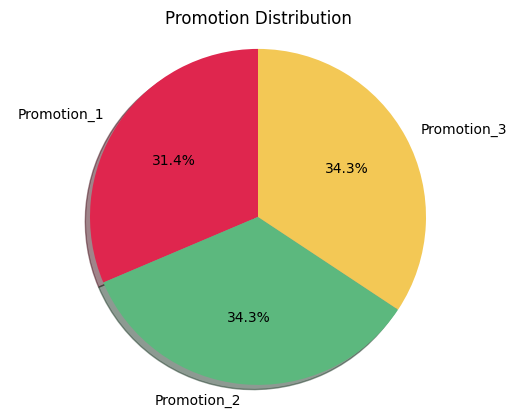

In [39]:
promotion_dict = df.groupby("Promotion")["LocationID"].nunique().to_dict()

colors = ['#df264e', '#5cb87e', '#f3c855']

plt.pie(list(promotion_dict.values()),
        labels=promotion_dict.keys(),
        colors=colors, 
        autopct='%2.1f%%', 
        shadow=True, 
        startangle=90)

plt.title('Promotion Distribution')
plt.axis('equal')
plt.show()

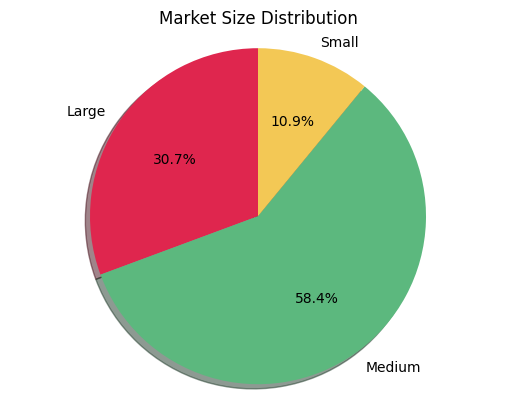

In [40]:
# Dictionary for MarketSize counts
marketsize_dict = df.groupby("MarketSize")["LocationID"].nunique().to_dict()

# Define colors for the pie chart
colors = ['#df264e', '#5cb87e', '#f3c855']

# Plotting
plt.pie(
    list(marketsize_dict.values()),
    labels=marketsize_dict.keys(),
    colors=colors,
    autopct='%2.1f%%',
    shadow=True,
    startangle=90)

plt.axis('equal')
plt.title('Market Size Distribution')  # Adding title here
plt.show()

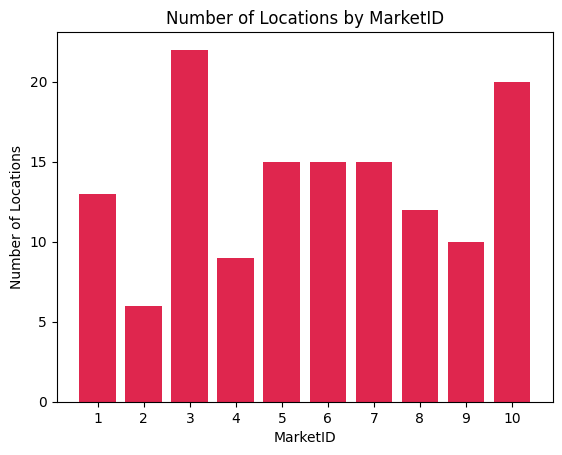

In [28]:
# Group data and count LocationID per MarketID
marketbyloct_dict = df.groupby("MarketID")["LocationID"].nunique().to_dict()

# Prepare data for plotting
x_labels = list(marketbyloct_dict.keys())
y_values = list(marketbyloct_dict.values())

# Plotting
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel('MarketID')
plt.ylabel('Number of Locations')
plt.title('Number of Locations by MarketID')
plt.bar(range(len(x_labels)), y_values, color='#df264e')  # Adding color for clarity
plt.show()

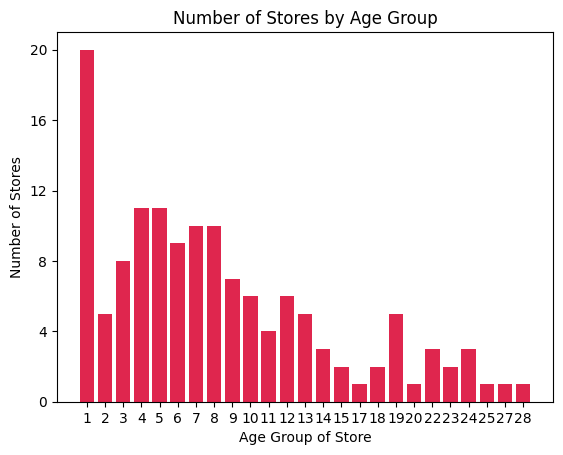

In [48]:
# Count stores in each age group
age_group_counts = df.groupby("AgeOfStore")["LocationID"].nunique().sort_index()

# Prepare data for plotting
x_labels = age_group_counts.index
y_values = age_group_counts.values

# Plotting
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel('Age Group of Store')
plt.ylabel('Number of Stores')
plt.title('Number of Stores by Age Group')
plt.bar(range(len(x_labels)), y_values, color='#df264e')

plt.yticks(range(0, max(y_values) + 1, 4)) 

plt.show()

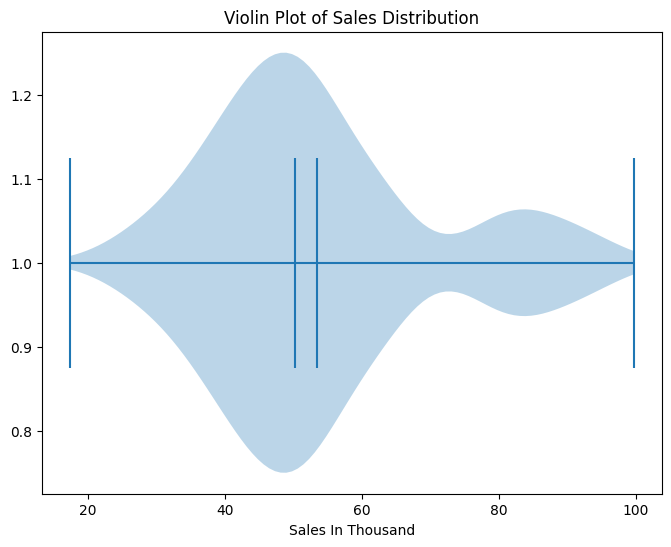

In [22]:
column_data = df["SalesInThousands"]

plt.figure(figsize=(8, 6))
plt.violinplot(column_data, vert=False, showmeans=True, showmedians=True)
plt.xlabel("Sales In Thousand")  
plt.title("Violin Plot of Sales Distribution")
plt.show()

### <b>Analysis Results</b>

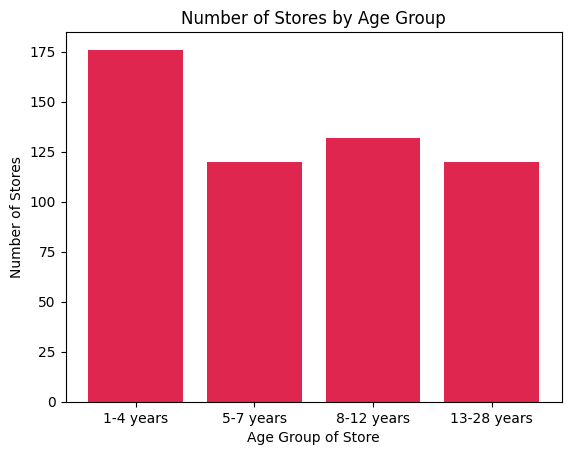

In [84]:
# Define age groups and labels
age_bins = [0, 4, 7, 12, 28]  # Define the bins for each group
age_labels = ["1-4 years", "5-7 years", "8-12 years", "13-28 years"]

# Create a new column in df for age group categories
df["AgeGroup"] = pd.cut(df["AgeOfStore"], bins=age_bins, labels=age_labels, right=True)

# Count stores in each age group
age_group_counts = df["AgeGroup"].value_counts().sort_index()

# Prepare data for plotting
x_labels = age_group_counts.index
y_values = age_group_counts.values

# Plotting
plt.xticks(range(len(x_labels)), x_labels)
plt.xlabel('Age Group of Store')
plt.ylabel('Number of Stores')
plt.title('Number of Stores by Age Group')
plt.bar(range(len(x_labels)), y_values, color='#df264e')  # Adding color for clarity
plt.show()